<a href="https://colab.research.google.com/github/SOWMYA34545/us_visa_approval/blob/main/US_VISA_Approval_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [ ]:
df = pd.read_csv(r"Visadataset.csv")

In [ ]:
df  .head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
df.shape

(25480, 12)

In [ ]:
# Display summary statistics for a dataframe
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [ ]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

We have 9 categorical features : ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [ ]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64
---------------------------
continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64
---------------------------
education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64
---------------------------
has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64
---------------------------
requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64
---------------------------
region_of_employment
Northeast    2

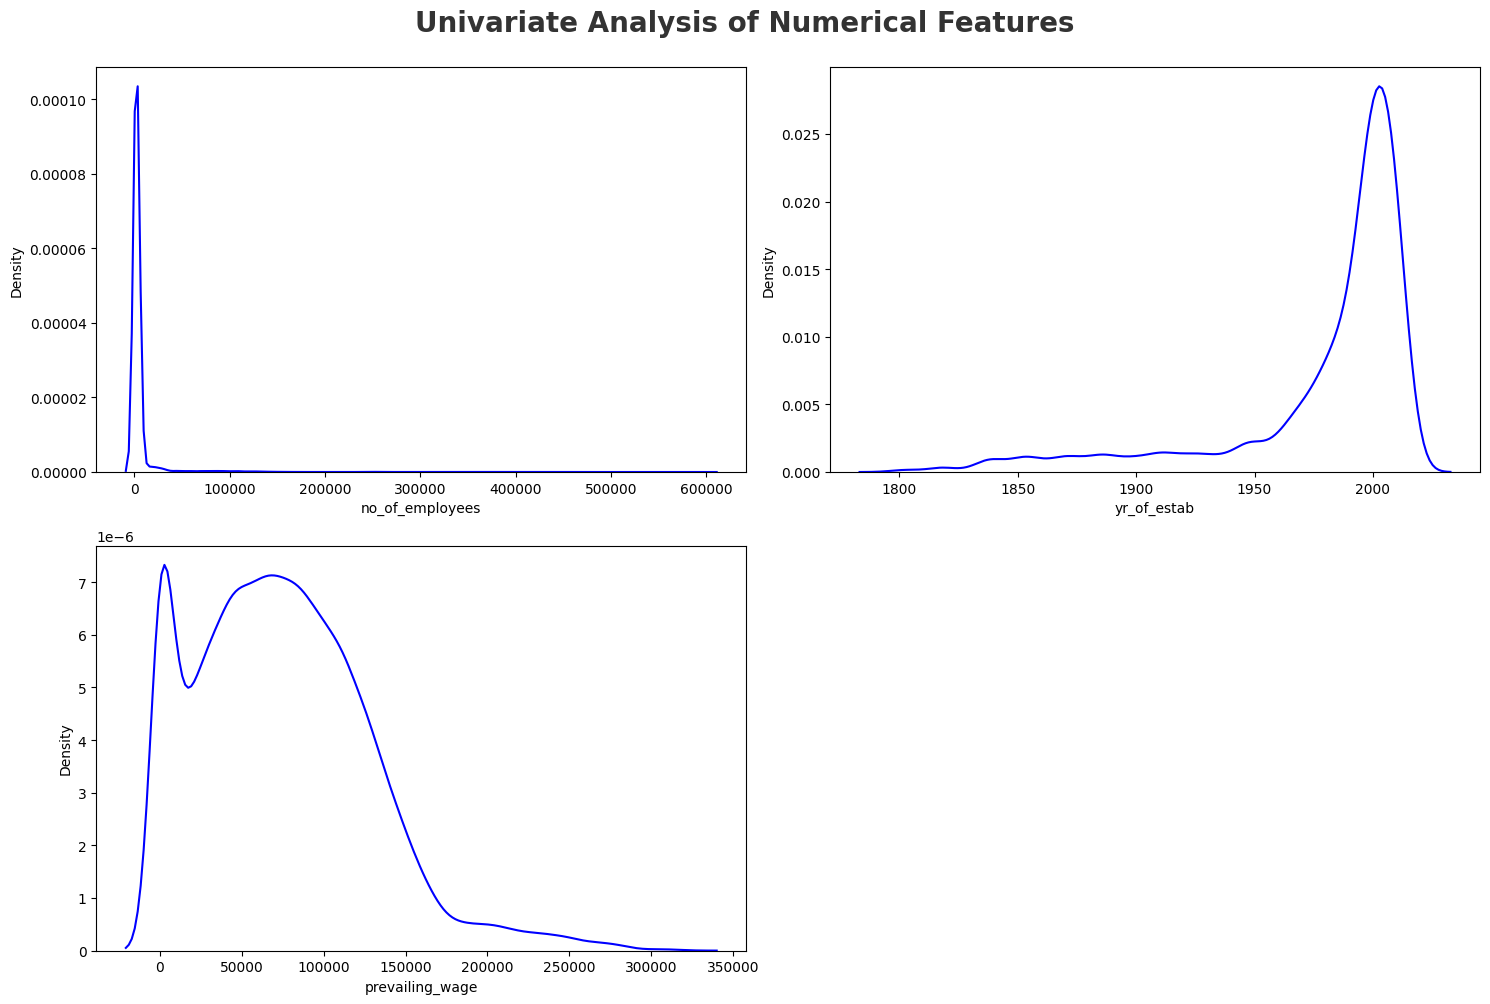

In [ ]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

# save plot
plt.savefig('/content/images/Univariate_Num.png')

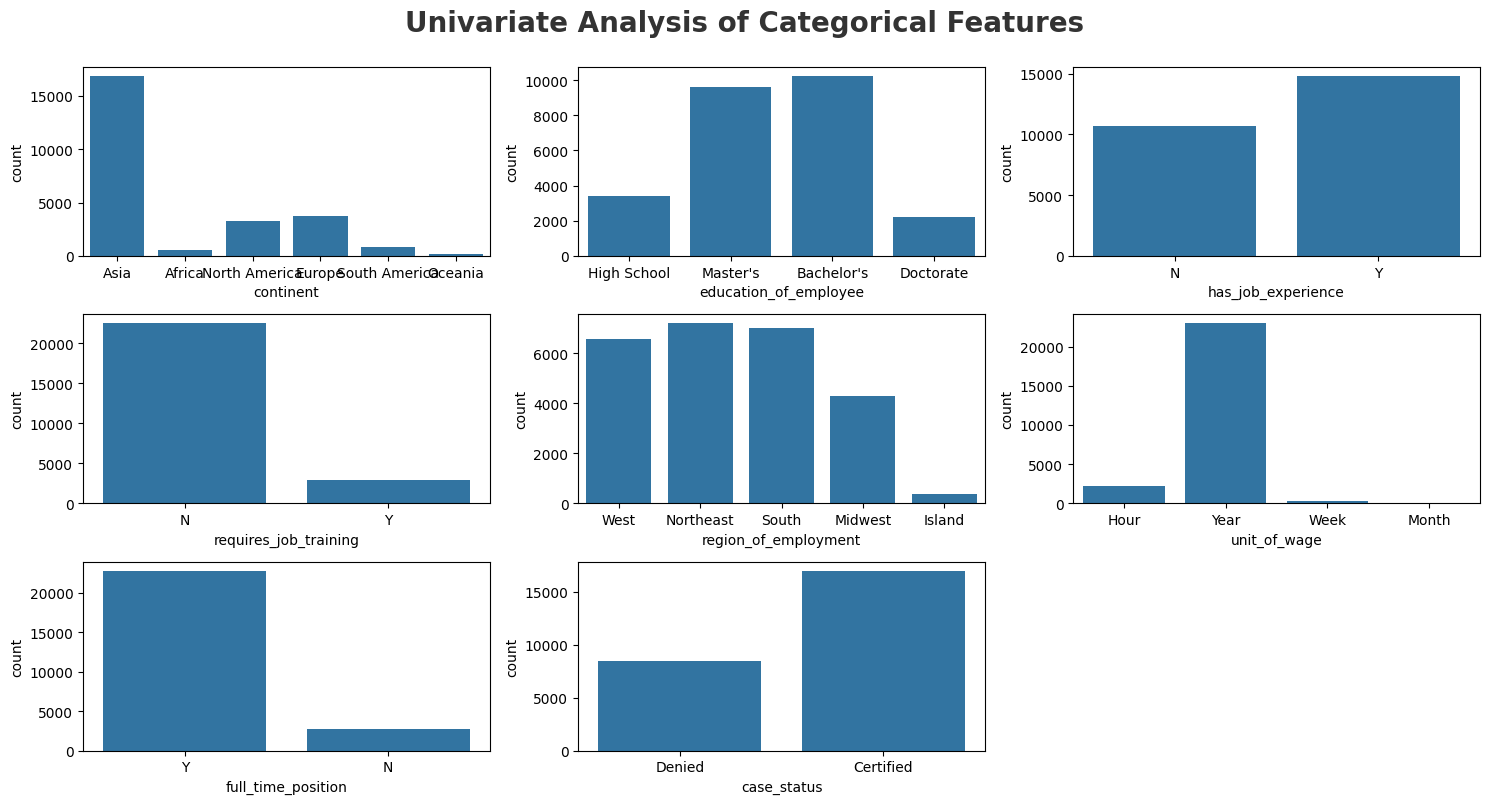

In [ ]:
# categorical columns
categorical_features.remove('case_id')
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()

# save plot
plt.savefig('/content/images/Univariate_Cat.png')

In [ ]:
df_numeric = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')  # Convert to numeric, setting non-numeric to NaN
df_numeric.corr()  # Compute correlation


,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
continent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,NaN,NaN,NaN,NaN,1.000000,-0.017770,NaN,-0.009523,NaN,NaN,NaN
yr_of_estab,NaN,NaN,NaN,NaN,-0.017770,1.000000,NaN,0.012342,NaN,NaN,NaN
region_of_employment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,NaN,NaN,NaN,NaN,-0.009523,0.012342,NaN,1.000000,NaN,NaN,NaN
unit_of_wage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_time_position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_numeric = df.select_dtypes(include=[np.number])  # Keep only numeric columns
df_numeric.corr()


,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [ ]:
print(df.dtypes)


case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object


In [ ]:
df_numeric = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
print(df_numeric.dtypes)  # Verify all columns are numeric
print(df_numeric.head())   # Check for unexpected NaN values
df_numeric.corr()  # Compute correlation


continent                float64
education_of_employee    float64
has_job_experience       float64
requires_job_training    float64
no_of_employees            int64
yr_of_estab                int64
region_of_employment     float64
prevailing_wage          float64
unit_of_wage             float64
full_time_position       float64
case_status              float64
dtype: object
   continent  education_of_employee  has_job_experience  \
0        NaN                    NaN                 NaN   
1        NaN                    NaN                 NaN   
2        NaN                    NaN                 NaN   
3        NaN                    NaN                 NaN   
4        NaN                    NaN                 NaN   

   requires_job_training  no_of_employees  yr_of_estab  region_of_employment  \
0                    NaN            14513         2007                   NaN   
1                    NaN             2412         2002                   NaN   
2                    NaN    

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
continent,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,NaN,NaN,NaN,NaN,1.000000,-0.017770,NaN,-0.009523,NaN,NaN,NaN
yr_of_estab,NaN,NaN,NaN,NaN,-0.017770,1.000000,NaN,0.012342,NaN,NaN,NaN
region_of_employment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,NaN,NaN,NaN,NaN,-0.009523,0.012342,NaN,1.000000,NaN,NaN,NaN
unit_of_wage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_time_position,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_numeric = df.iloc[:, 1:].select_dtypes(include=[np.number])
df_numeric.corr()


,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [ ]:
print(df.head())


  case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y      Denied  
1       83425.65

In [ ]:
import numpy as np

df_numeric = df.iloc[:, 1:].select_dtypes(include=[np.number])  # Keep only numeric columns
print(df_numeric.dtypes)  # Verify all columns are numeric
df_numeric.corr()  # Compute correlation

no_of_employees      int64
yr_of_estab          int64
prevailing_wage    float64
dtype: object


,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


In [ ]:
print(df.dtypes)
print(df.head())

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object
  case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df.columns:
    if df[col].dtype == 'object':  # If column contains strings
        df_encoded[col] = LabelEncoder().fit_transform(df[col])

df_encoded.corr()  # Compute correlation


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
case_id,1.000000,-0.002214,-0.003195,-0.004933,-0.002862,-0.001346,0.004064,0.012284,0.007788,0.005533,-0.009979,-0.013230
continent,-0.002214,1.000000,0.000813,-0.005431,0.035175,0.009647,-0.027108,0.053707,-0.108609,-0.089615,0.007234,0.017606
education_of_employee,-0.003195,0.000813,1.000000,0.010948,-0.052972,0.016189,-0.006935,-0.104824,0.047208,0.029335,-0.158681,-0.100919
has_job_experience,-0.004933,-0.005431,0.010948,1.000000,-0.112195,0.007829,0.000821,0.020860,-0.016216,0.125457,0.041964,-0.192162
requires_job_training,-0.002862,0.035175,-0.052972,-0.112195,1.000000,-0.005545,-0.006490,0.114433,0.054945,0.083720,0.104590,-0.008423
no_of_employees,-0.001346,0.009647,0.016189,0.007829,-0.005545,1.000000,-0.017770,0.011801,-0.009523,0.019549,-0.010472,-0.008677
yr_of_estab,0.004064,-0.027108,-0.006935,0.000821,-0.006490,-0.017770,1.000000,-0.003968,0.012342,0.042375,0.009318,-0.008597
region_of_employment,0.012284,0.053707,-0.104824,0.020860,0.114433,0.011801,-0.003968,1.000000,-0.103105,-0.013402,0.031202,0.053490
prevailing_wage,0.007788,-0.108609,0.047208,-0.016216,0.054945,-0.009523,0.012342,-0.103105,1.000000,0.416986,-0.197729,-0.076198
unit_of_wage,0.005533,-0.089615,0.029335,0.125457,0.083720,0.019549,0.042375,-0.013402,0.416986,1.000000,-0.099309,-0.207528


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df.columns:
    if df[col].dtype == 'object':  # If column contains strings
        df_encoded[col] = LabelEncoder().fit_transform(df[col])

df_encoded.corr()  # Compute correlation

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
case_id,1.000000,-0.002214,-0.003195,-0.004933,-0.002862,-0.001346,0.004064,0.012284,0.007788,0.005533,-0.009979,-0.013230
continent,-0.002214,1.000000,0.000813,-0.005431,0.035175,0.009647,-0.027108,0.053707,-0.108609,-0.089615,0.007234,0.017606
education_of_employee,-0.003195,0.000813,1.000000,0.010948,-0.052972,0.016189,-0.006935,-0.104824,0.047208,0.029335,-0.158681,-0.100919
has_job_experience,-0.004933,-0.005431,0.010948,1.000000,-0.112195,0.007829,0.000821,0.020860,-0.016216,0.125457,0.041964,-0.192162
requires_job_training,-0.002862,0.035175,-0.052972,-0.112195,1.000000,-0.005545,-0.006490,0.114433,0.054945,0.083720,0.104590,-0.008423
no_of_employees,-0.001346,0.009647,0.016189,0.007829,-0.005545,1.000000,-0.017770,0.011801,-0.009523,0.019549,-0.010472,-0.008677
yr_of_estab,0.004064,-0.027108,-0.006935,0.000821,-0.006490,-0.017770,1.000000,-0.003968,0.012342,0.042375,0.009318,-0.008597
region_of_employment,0.012284,0.053707,-0.104824,0.020860,0.114433,0.011801,-0.003968,1.000000,-0.103105,-0.013402,0.031202,0.053490
prevailing_wage,0.007788,-0.108609,0.047208,-0.016216,0.054945,-0.009523,0.012342,-0.103105,1.000000,0.416986,-0.197729,-0.076198
unit_of_wage,0.005533,-0.089615,0.029335,0.125457,0.083720,0.019549,0.042375,-0.013402,0.416986,1.000000,-0.099309,-0.207528


In [ ]:
# df[(list(df.columns)[1:])].corr()

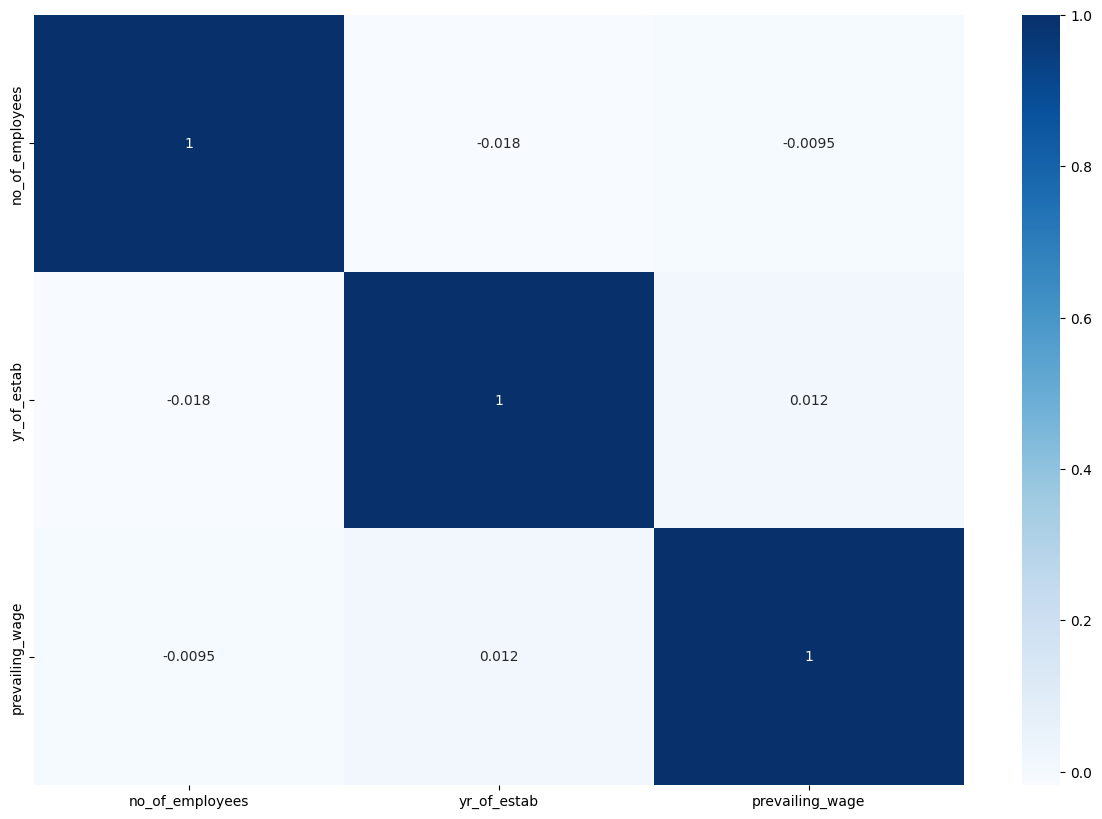

In [ ]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt

# Select only numeric columns
# df_numeric = df.select_dtypes(include=[np.number])
# df1=df.copy()-- IF INCLUDED GOT EROOR
# Plot heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df_numeric.corr(), cmap="Blues", annot=True)
plt.show()


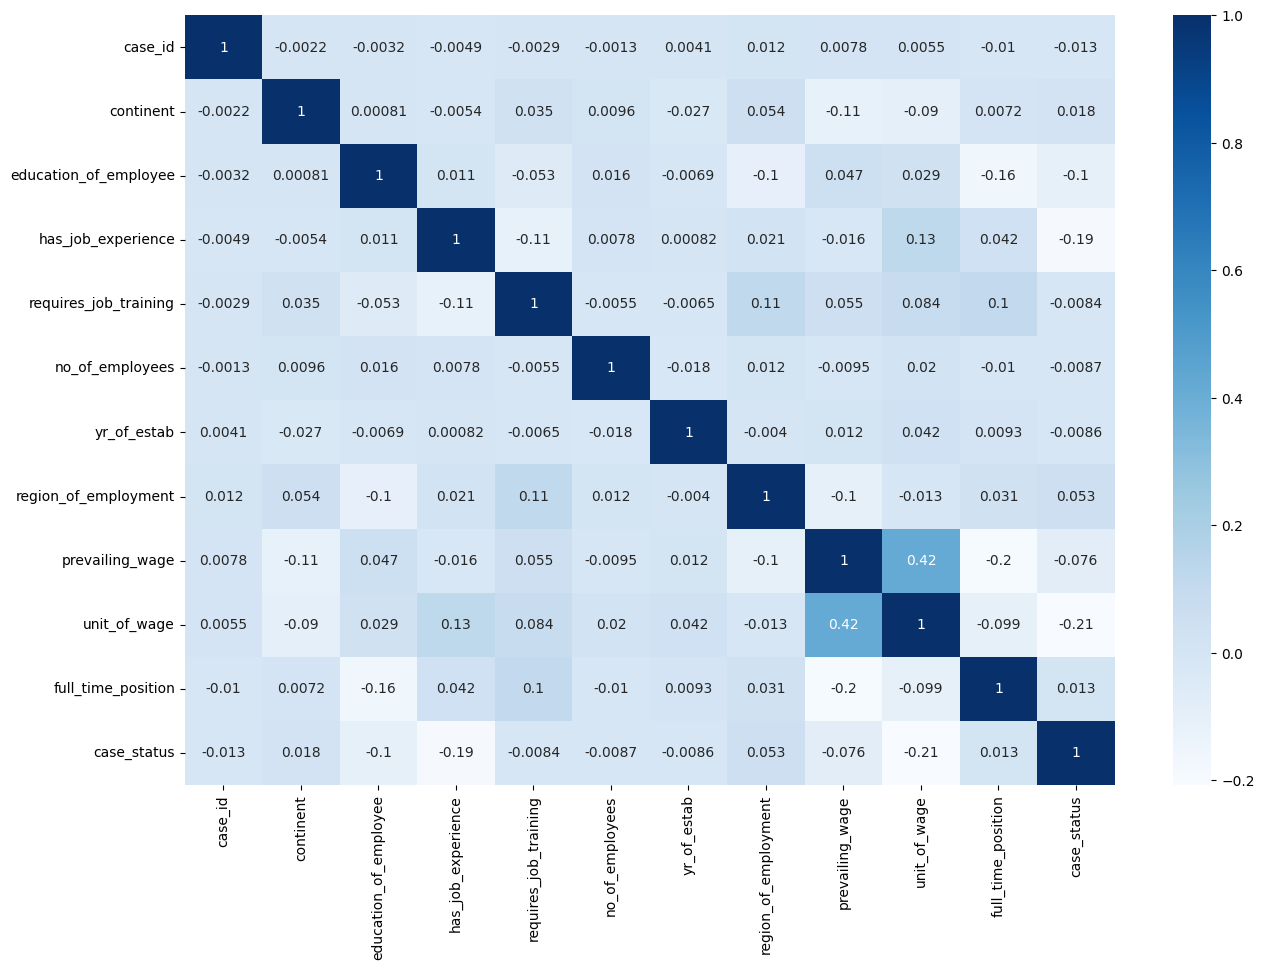

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
for col in df.columns:
    if df[col].dtype == 'object':  # Convert only categorical columns
        df_encoded[col] = LabelEncoder().fit_transform(df[col])

# Now plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(df_encoded.corr(), cmap="Blues", annot=True)
plt.show()


In [ ]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Fail to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


In [ ]:
df.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [ ]:
continues_features=[feature for feature in numeric_features if len(df[feature].unique())>=10]
print('Num of continues features :',continues_features)

Num of continues features : ['no_of_employees', 'yr_of_estab', 'prevailing_wage']


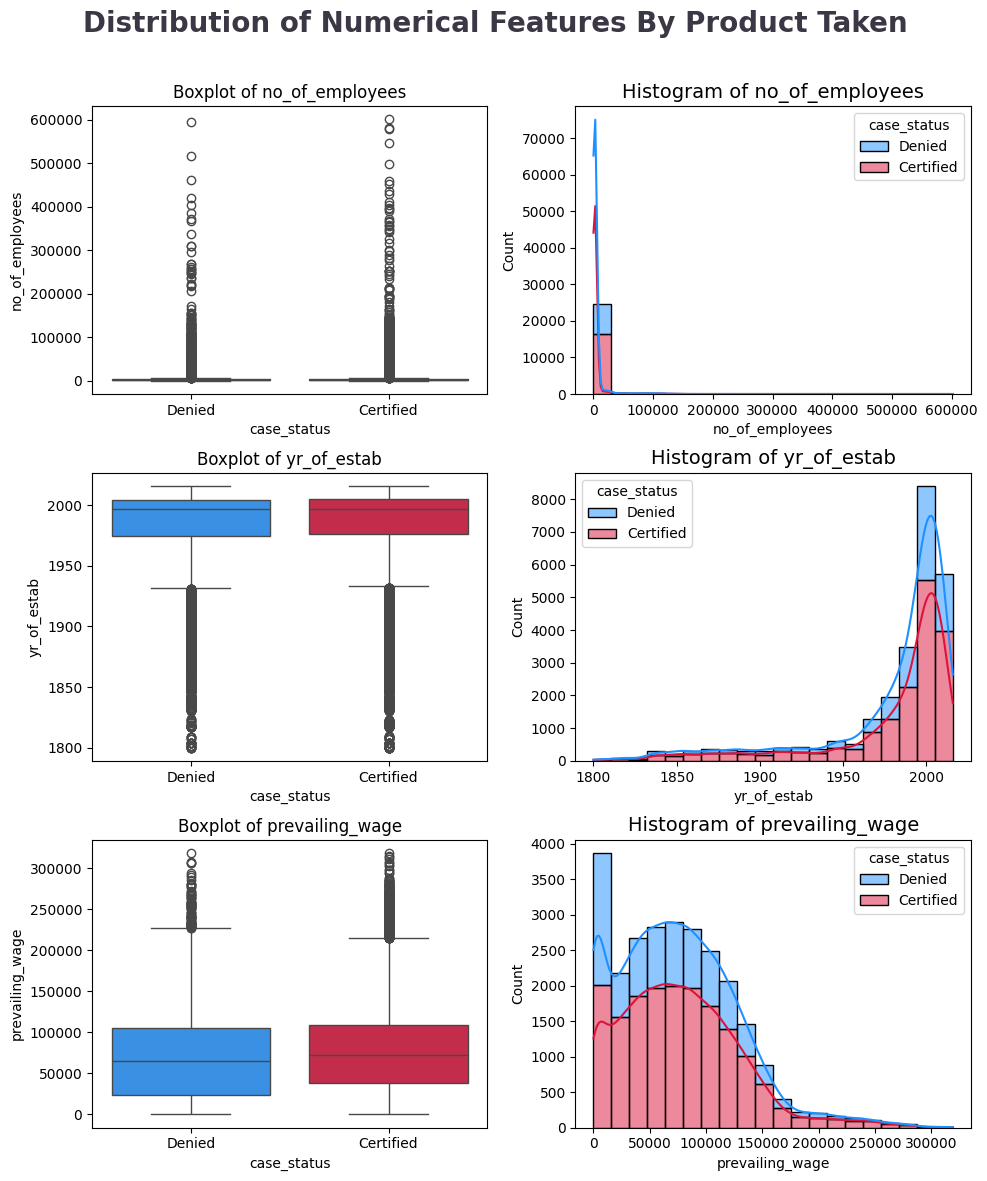

In [ ]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Product Taken', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(continues_features):
    sns.boxplot(data=df, x='case_status', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='case_status', bins=20, kde=True,
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.savefig('images/multivariate_num.png')

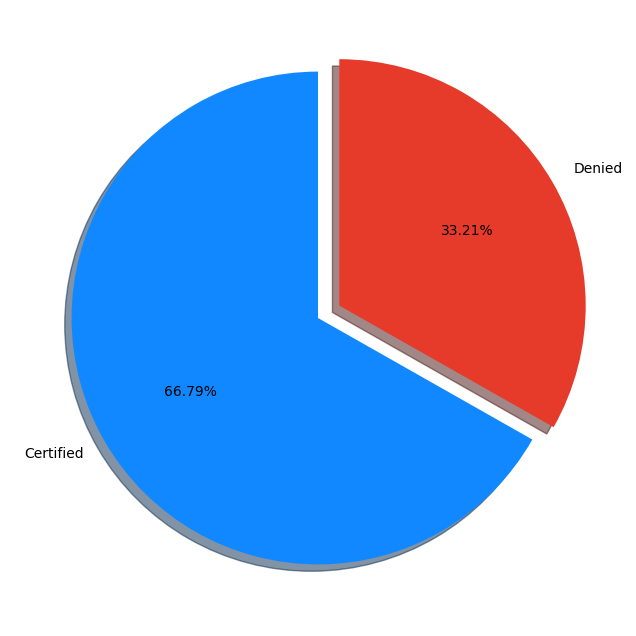

In [ ]:
percentage = df.case_status.value_counts(normalize=True)*100
labels = ["Certified","Denied"]

# Plot PieChart with Ploty library
fig, ax = plt.subplots(figsize =(15, 8))
explode = (0, 0.1)
colors = ['#1188ff','#e63a2a']
ax.pie(percentage, labels = labels, startangle = 90,
       autopct='%1.2f%%',explode=explode, shadow=True, colors=colors)
plt.show()

In [ ]:
df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [ ]:
#group data by continent and their count of case_status
df.groupby('continent')['case_status'].value_counts().to_frame()

count
continent     case_status       
Africa        Certified      397
              Denied         154
Asia          Certified    11012
              Denied        5849
Europe        Certified     2957
              Denied         775
North America Certified     2037
              Denied        1255
Oceania       Certified      122
              Denied          70
South America Certified      493
              Denied         359

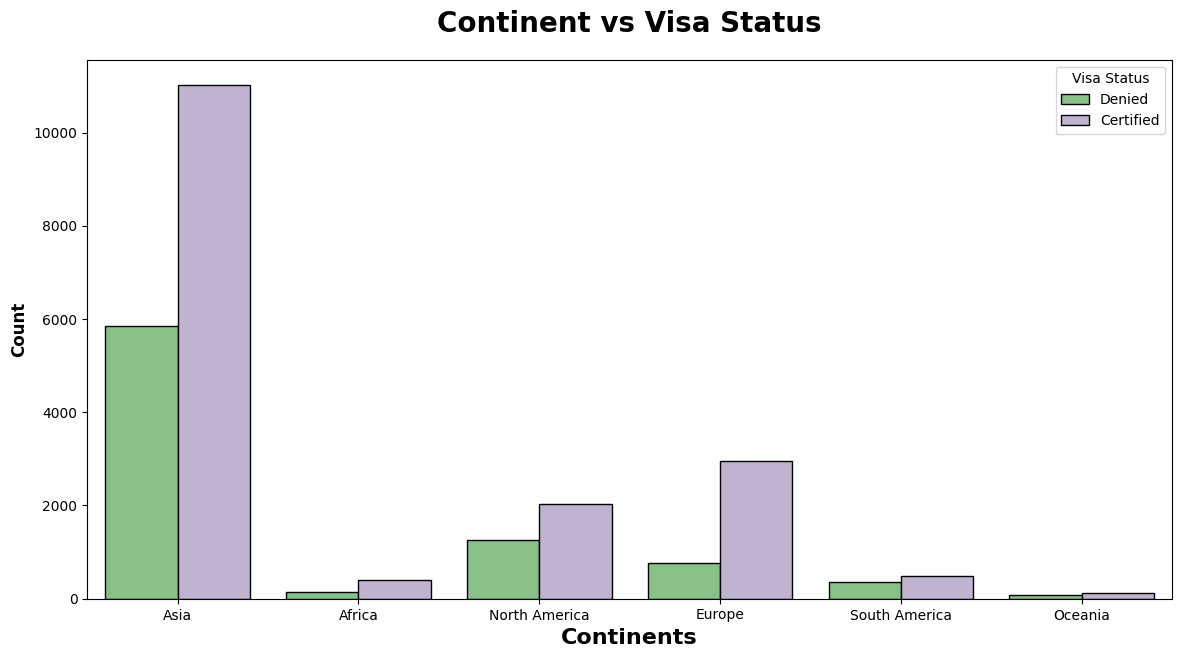

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="continent",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Continent vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Continents", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [ ]:
#group data by Education and their count of case_status
df.groupby('education_of_employee')['case_status'].value_counts().to_frame()

count
education_of_employee case_status       
Bachelor's            Certified     6367
                      Denied        3867
Doctorate             Certified     1912
                      Denied         280
High School           Denied        2256
                      Certified     1164
Master's              Certified     7575
                      Denied        2059

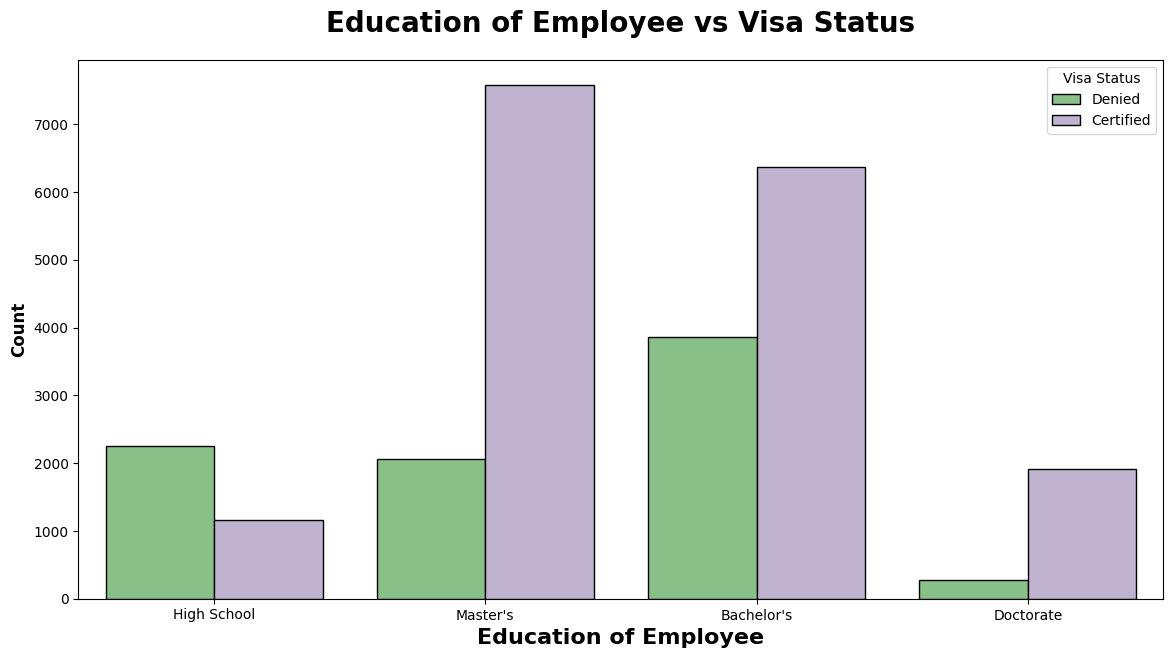

In [ ]:
plt.subplots(figsize=(14,7))
sns.countplot(x="education_of_employee",hue="case_status", data=df, ec = "black",palette="Accent")
plt.title("Education of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Education of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [ ]:
#group data by has_job_experience and count case_status
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame()

proportion
has_job_experience case_status            
N                  Certified      0.561341
                   Denied         0.438659
Y                  Certified      0.744764
                   Denied         0.255236

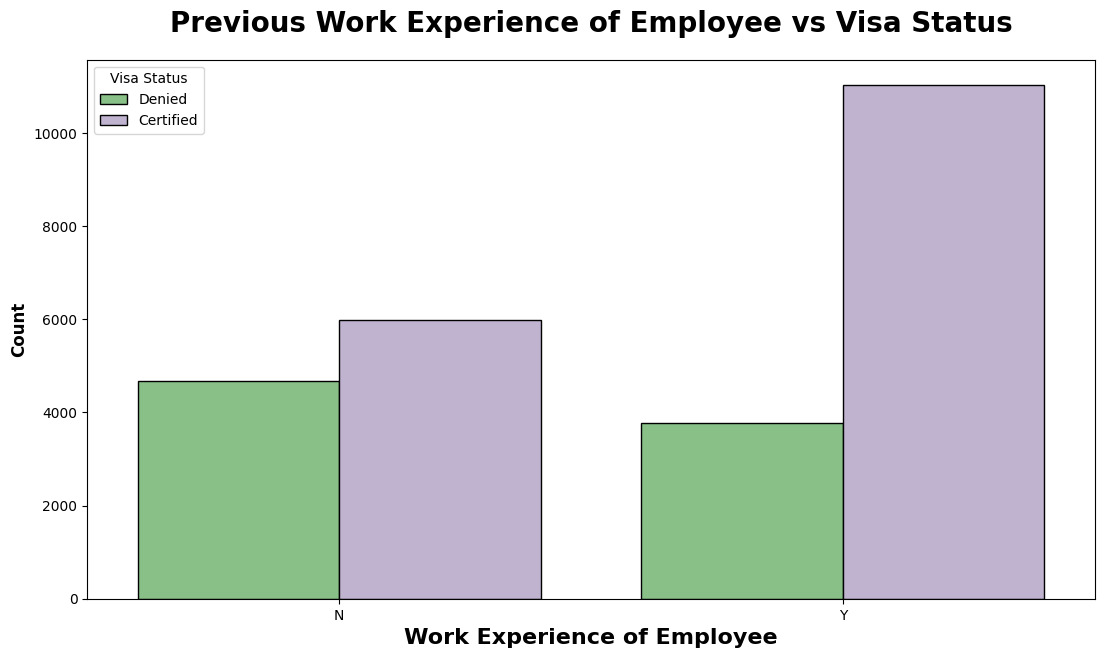

In [ ]:
plt.subplots(figsize=(13,7))
sns.countplot(x="has_job_experience",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Previous Work Experience of Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Work Experience of Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

In [ ]:
#group data by requires_job_training and count case_status
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame()

proportion
requires_job_training case_status            
N                     Certified      0.666459
                      Denied         0.333541
Y                     Certified      0.678849
                      Denied         0.321151

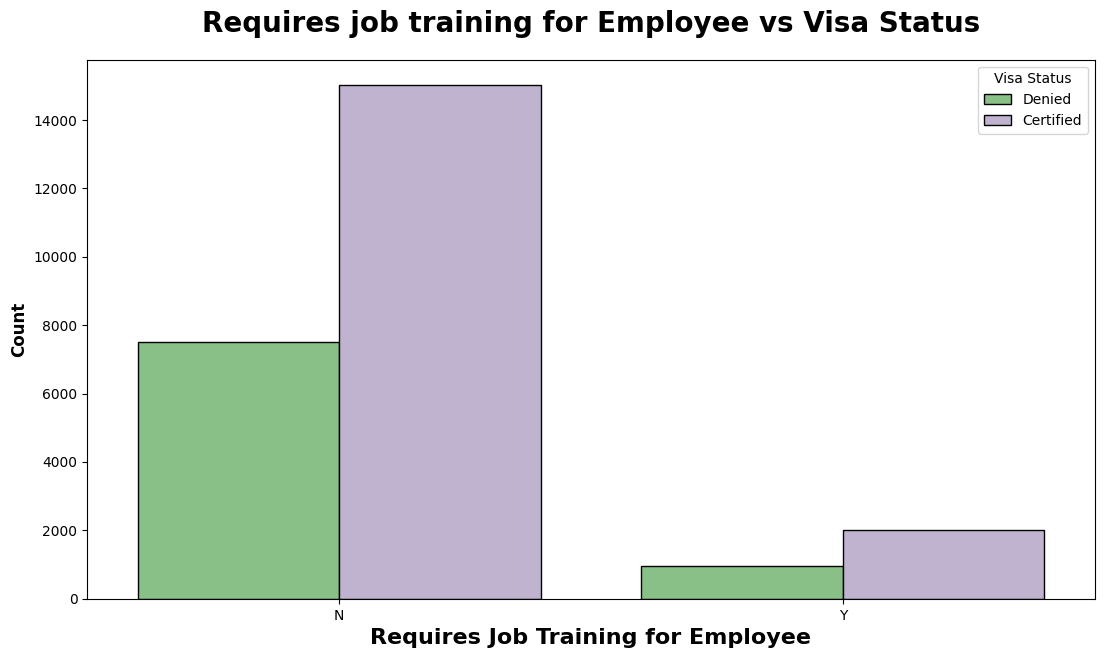

In [ ]:
plt.subplots(figsize=(13,7))
sns.countplot(x="requires_job_training",hue="case_status", data=df, ec= "black",palette="Accent")
plt.title("Requires job training for Employee vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Requires Job Training for Employee", weight="bold", fontsize=16)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

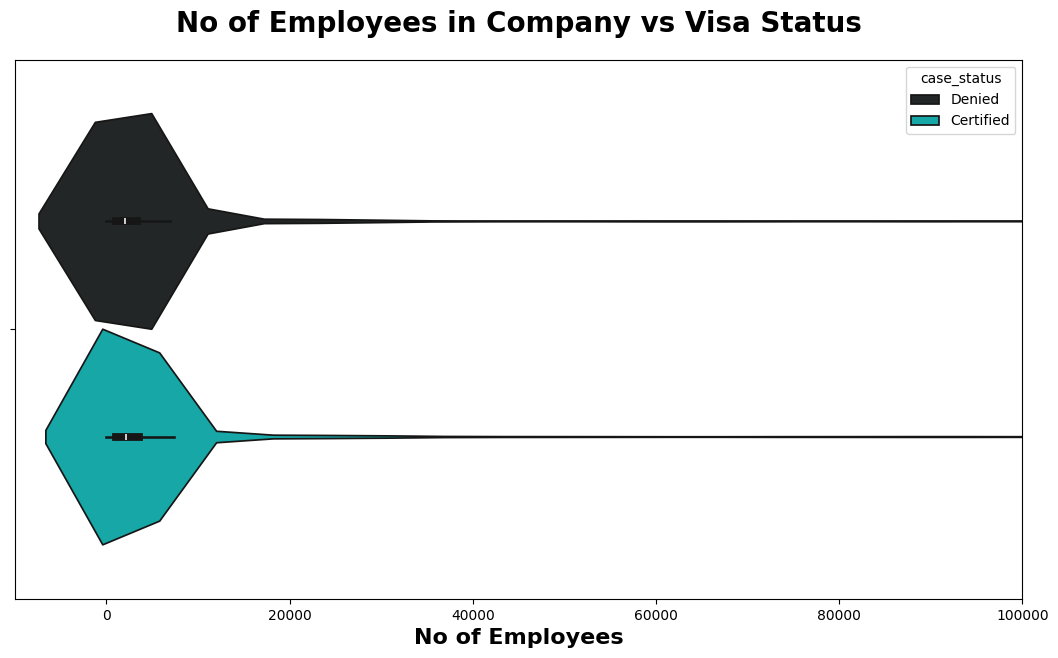

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure 'no_of_employees' is numeric
df["no_of_employees"] = pd.to_numeric(df["no_of_employees"], errors='coerce')

# Plot violin plot
plt.figure(figsize=(13,7))
sns.violinplot(x="no_of_employees", hue="case_status", data=df, color='c', inner="box")  # Use inner="box" instead
plt.title("No of Employees in Company vs Visa Status", weight="bold", fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.xlim(-10000, 100000)
plt.show()


In [ ]:
#group data by unit_of_wage and count the case_status
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True)

unit_of_wage  case_status
Hour          Denied         0.653686
              Certified      0.346314
Month         Certified      0.617978
              Denied         0.382022
Week          Certified      0.621324
              Denied         0.378676
Year          Certified      0.698850
              Denied         0.301150
Name: proportion, dtype: float64

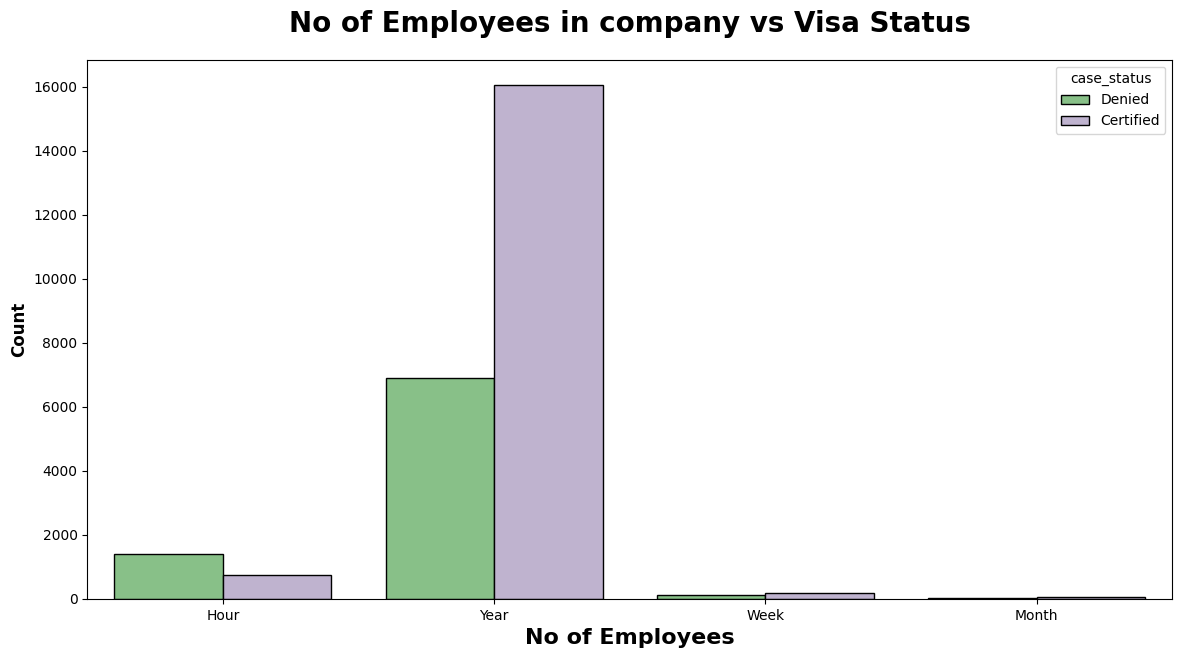

In [45]:
plt.subplots(figsize=(14,7))
sns.countplot(x="unit_of_wage",hue="case_status", data=df,ec='k', palette='Accent')
plt.title("No of Employees in company vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("No of Employees", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

In [48]:
df.groupby('prevailing_wage').case_status.value_counts()

,,count
prevailing_wage,case_status,
2.1367,Certified,1
2.9561,Denied,1
3.0031,Denied,1
3.3188,Denied,1
3.4889,Certified,1
...,...,...
311734.4900,Certified,1
314156.0600,Certified,1
315497.6000,Certified,1


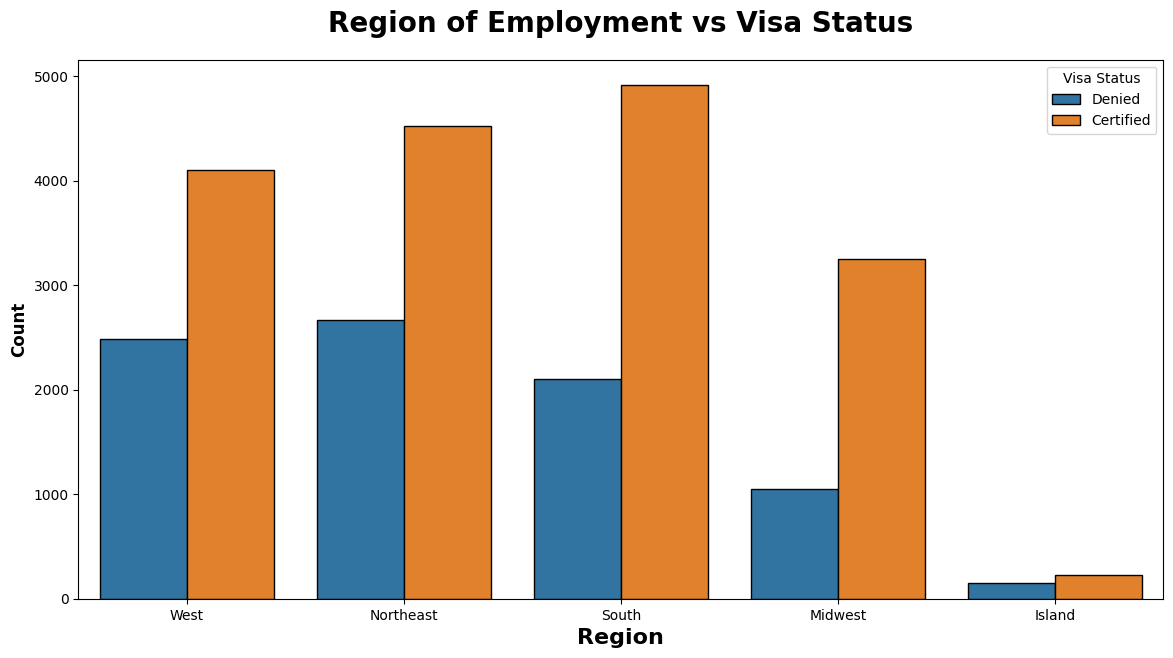

In [47]:
plt.subplots(figsize=(14,7))
sns.countplot(x="region_of_employment",hue="case_status", data=df,ec='k')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.legend(title="Visa Status", fancybox=True)
plt.show()

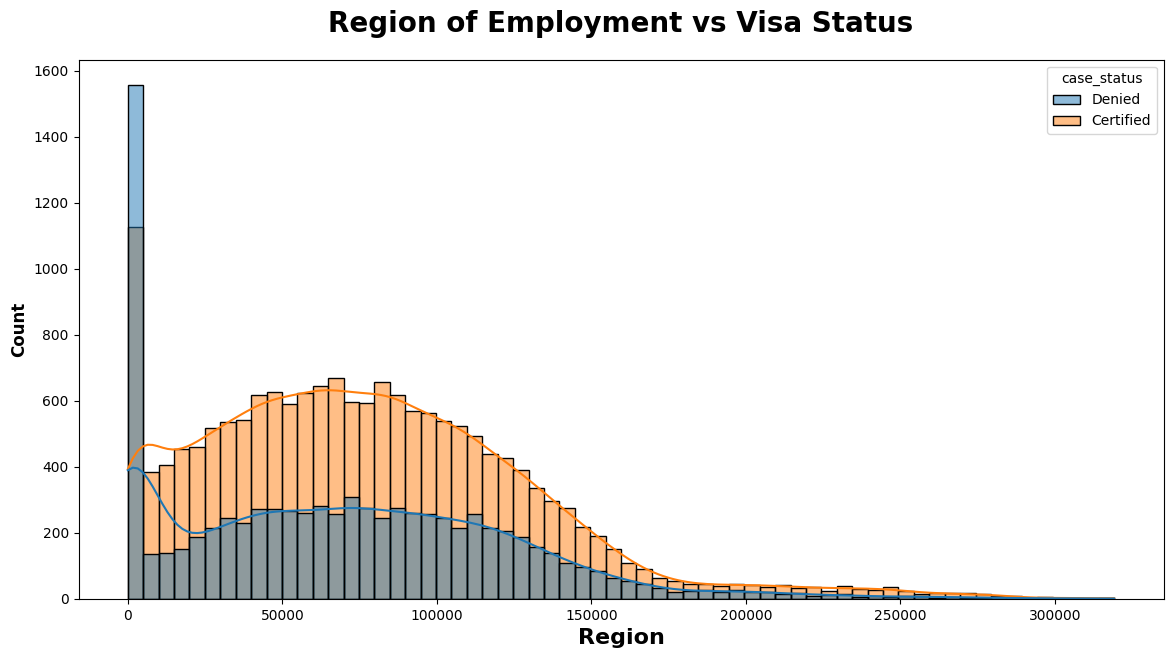

In [49]:
plt.subplots(figsize=(14,7))
sns.histplot(x="prevailing_wage",hue="case_status", data=df, kde=True)
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Region", weight="bold", fontsize=16)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.show()

In [50]:
print('Average Prevailing wage based on Employee education')
df.groupby('education_of_employee')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Employee education


,prevailing_wage
education_of_employee,
Master's,78843.057843
Bachelor's,73405.443735
High School,71582.147756
Doctorate,64561.076657


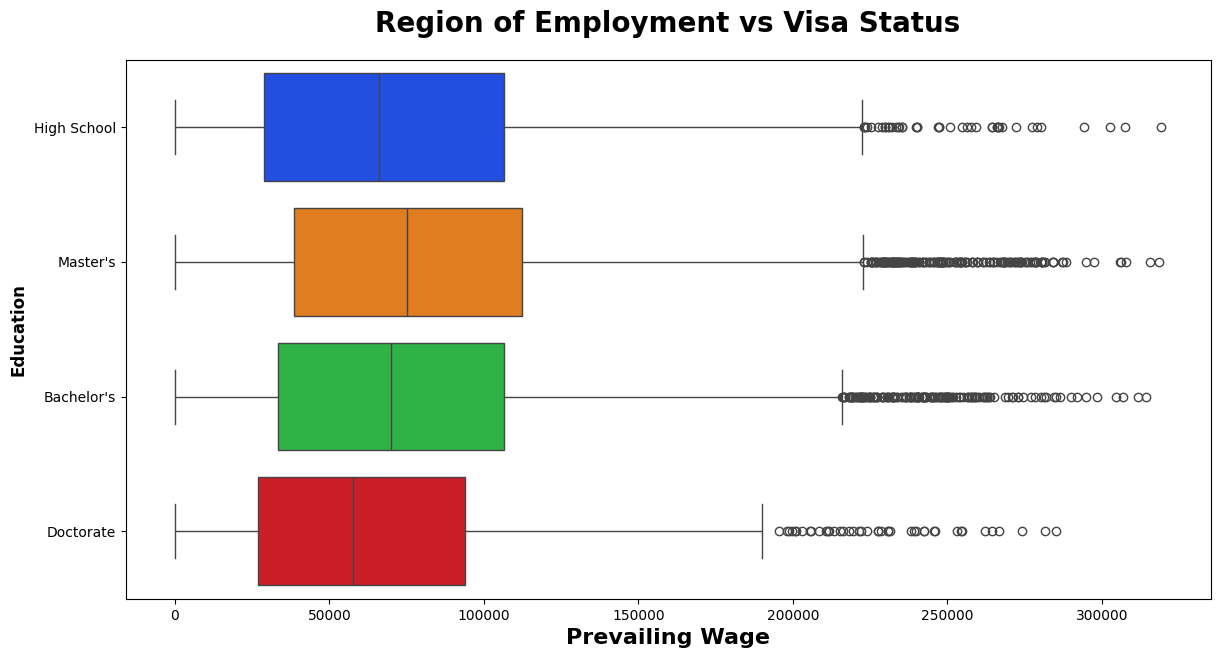

In [51]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="education_of_employee",x = "prevailing_wage", data=df,palette='bright')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

In [52]:
print('Median Prevailing wage based on Job experience')
df.groupby('has_job_experience')['prevailing_wage'].median().to_frame().sort_values(by='prevailing_wage',ascending=False)

Median Prevailing wage based on Job experience


,prevailing_wage
has_job_experience,
N,72602.290
Y,69033.665


In [53]:
print('Average Prevailing wage based on Continent')
df.groupby('continent')['prevailing_wage'].mean().to_frame().sort_values(by='prevailing_wage',ascending=False)

Average Prevailing wage based on Continent


,prevailing_wage
continent,
Asia,79543.021780
Africa,77425.923450
Oceania,75994.276719
North America,68066.319257
South America,60209.575314
Europe,59842.925899


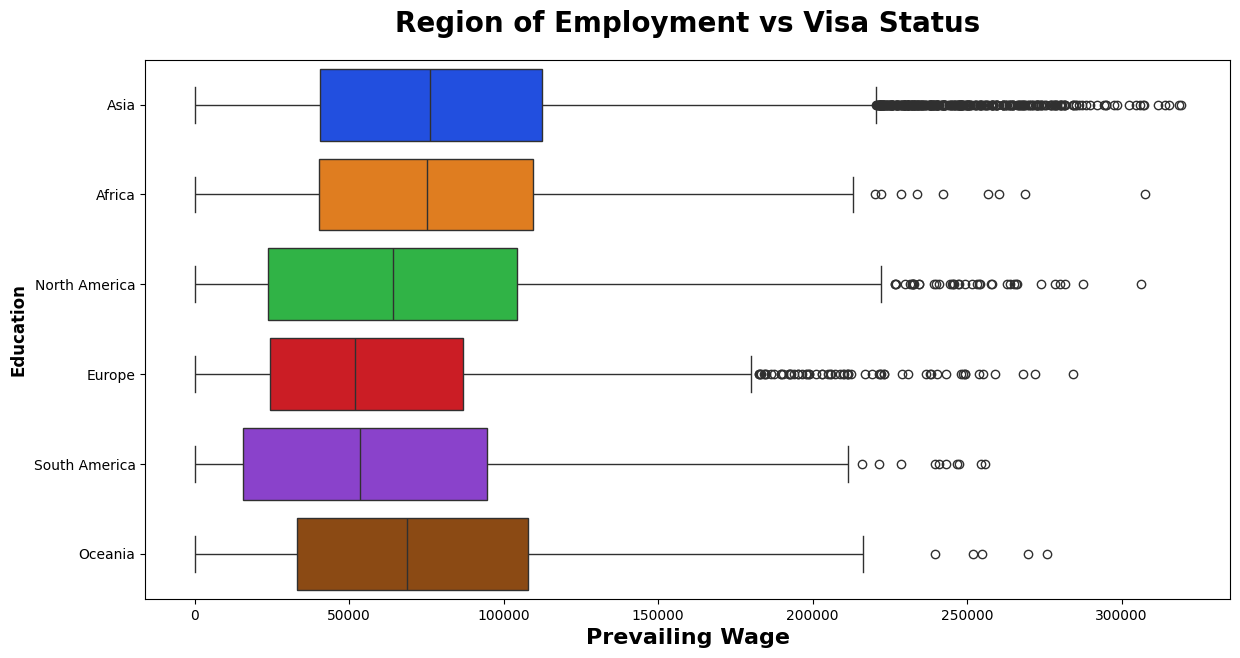

In [54]:
plt.subplots(figsize=(14,7))
sns.boxplot(y="continent",x = "prevailing_wage", data=df,palette='bright')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

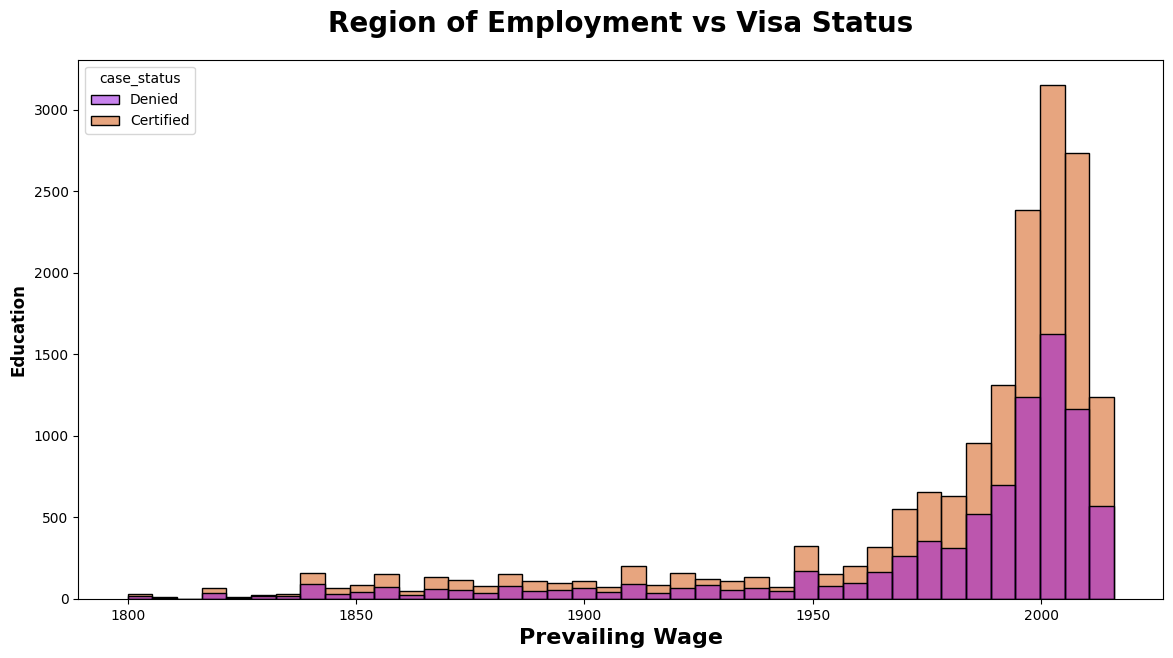

In [55]:
plt.subplots(figsize=(14,7))
sns.histplot(x = "yr_of_estab", data=df,palette='gnuplot', bins=40, hue='case_status')
plt.title("Region of Employment vs Visa Status", weight="bold",fontsize=20, pad=20)
plt.xlabel("Prevailing Wage", weight="bold", fontsize=16)
plt.ylabel("Education", weight="bold", fontsize=12)
plt.show()

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.pandas.set_option("display.max_columns", None)
# Create Dataframe
df = pd.read_csv(r"/content/Visadataset.csv")
# Print shape of dataset
print(df.shape)

(25480, 12)


In [59]:
##these are the features with nan value
features_with_na=[features for features in df.columns if df[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,5), '% missing values')

In [60]:
df.duplicated().sum()

0

In [61]:
df.drop('case_id', inplace=True, axis=1)

In [62]:
# importing date class from datetime module
from datetime import date

# creating the date object of today's date
todays_date = date.today()
current_year= todays_date.year

In [63]:
df['company_age'] = current_year-df['yr_of_estab']

In [64]:
df

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,18
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,23
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,17
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,128
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,20
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified,17
25476,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified,19
25477,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified,115
25478,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified,138


In [65]:
df.drop('yr_of_estab', inplace=True, axis=1)

In [66]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 3


In [67]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 8


In [68]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 0


In [69]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


In [70]:
df['case_status']= np.where(df.case_status == 'Denied', 1,0)

In [71]:
X = df.drop('case_status', axis=1)
y = df['case_status']

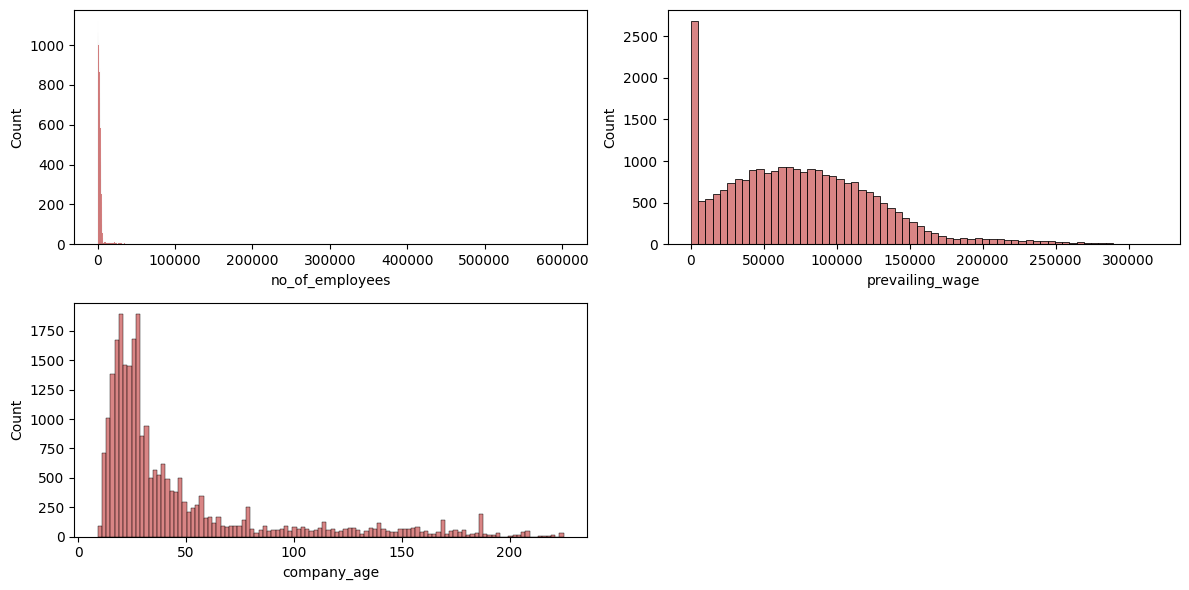

In [72]:
# distribution of data before scaling
plt.figure(figsize=(12, 6))
for i, col in enumerate(['no_of_employees','prevailing_wage','company_age']):
    plt.subplot(2, 2, i+1)
    sns.histplot(x=X[col], color='indianred')
    plt.xlabel(col)
    plt.tight_layout()

In [73]:
X[continuous_features].skew(axis=0, skipna=True)

,0
no_of_employees,12.265260
prevailing_wage,0.755776
company_age,2.037301


In [74]:
num_features = list(X.select_dtypes(exclude="object").columns)

In [75]:
# Create Column Transformer with 3 types of transformers
or_columns = ['has_job_experience','requires_job_training','full_time_position','education_of_employee']
oh_columns = ['continent','unit_of_wage','region_of_employment']
transform_columns= ['no_of_employees','company_age']

from sklearn.preprocessing import OneHotEncoder, StandardScaler,OrdinalEncoder, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
ordinal_encoder = OrdinalEncoder()

transform_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('transformer', PowerTransformer())
])

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, oh_columns),
        ("Ordinal_Encoder", ordinal_encoder, or_columns),
        ("Transformer", transform_pipe, transform_columns),
        ("StandardScaler", numeric_transformer, num_features)
    ]
)

In [76]:
X = preprocessor.fit_transform(X)

In [77]:
from imblearn.combine import SMOTETomek, SMOTEENN

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTEENN(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X, y)

In [78]:
from sklearn.model_selection import  train_test_split
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((13805, 24), (3452, 24))

In [81]:
pip install scikit-learn xgboost catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [82]:
!pip install xgboost catboost

In [87]:
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve

In [88]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [89]:
def evaluate_clf(true, predicted):
    acc = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return acc, f1 , precision, recall, roc_auc

In [90]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
     "Support Vector Classifier": SVC(),
    "AdaBoost Classifier": AdaBoostClassifier()
}

accuracy_list=[]
models_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy, model_train_f1,model_train_precision,\
    model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)


    # Test set performance
    model_test_accuracy,model_test_f1,model_test_precision,\
    model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)

    print(list(models.keys())[i])
    models_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print('- F1 score: {:.4f}'.format(model_train_f1))
    print('- Precision: {:.4f}'.format(model_train_precision))
    print('- Recall: {:.4f}'.format(model_train_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))



    print('----------------------------------')

    print('Model performance for Test set')
    print('- Accuracy: {:.4f}'.format(model_test_accuracy))
    print('- F1 score: {:.4f}'.format(model_test_f1))
    print('- Precision: {:.4f}'.format(model_test_precision))
    print('- Recall: {:.4f}'.format(model_test_recall))
    print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
    accuracy_list.append(model_test_accuracy)


    print('='*35)
    print('\n')

Random Forest
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9528
- F1 score: 0.9570
- Precision: 0.9558
- Recall: 0.9583
- Roc Auc Score: 0.9522


Decision Tree
Model performance for Training set
- Accuracy: 1.0000
- F1 score: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- Roc Auc Score: 1.0000
----------------------------------
Model performance for Test set
- Accuracy: 0.9290
- F1 score: 0.9357
- Precision: 0.9301
- Recall: 0.9414
- Roc Auc Score: 0.9277


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8919
- F1 score: 0.9010
- Precision: 0.8964
- Recall: 0.9056
- Roc Auc Score: 0.8905
----------------------------------
Model performance for Test set
- Accuracy: 0.8882
- F1 score: 0.8982
- Precision: 0.8973
- Recall: 0.8992
- Roc Auc Score: 0.8870


Logistic Regression
Model performance for Training 

In [91]:
Results = pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy_score'])
Results.sort_values(by=["Accuracy_score"],ascending=False)

,Model Name,Accuracy_score
0,Random Forest,0.952781
5,XGBClassifier,0.933662
4,K-Neighbors Classifier,0.932503
6,CatBoosting Classifier,0.929316
1,Decision Tree,0.929027
2,Gradient Boosting,0.888181
7,Support Vector Classifier,0.869930
8,AdaBoost Classifier,0.849363
3,Logistic Regression,0.742758


In [92]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['log2', 'sqrt', None]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
criterion = ["gini", "entropy", "log_loss"]
# Create the random grid
rf_params = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                   param_distributions=rf_params,
                                   n_iter=50,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [ ]:
best_params = random.best_params_
rf=RandomForestClassifier(**best_params, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

model_test_accuracy,model_test_f1,model_test_precision,model_test_recall,model_test_rocauc_score= evaluate_clf(y_test, y_pred)

print('Model performance for Test set')
print('- Accuracy: {:.4f}'.format(model_test_accuracy))
print('- F1 score: {:.4f}'.format(model_test_f1))
print('- Precision: {:.4f}'.format(model_test_precision))
print('- Recall: {:.4f}'.format(model_test_recall))
print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))

## Best Model is Random Forest with Accuracy 95.63%